## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of 

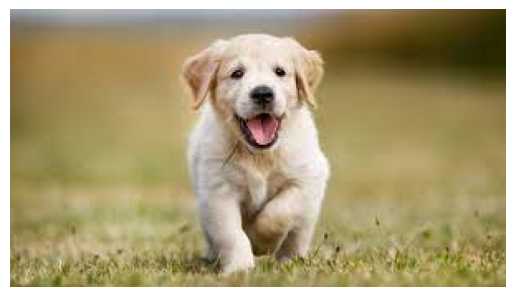

True

In [5]:
#Ans for Q1:
# Load the image
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('dog.jfif')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Save the image in PNG format
cv2.imwrite('dog.png', image)

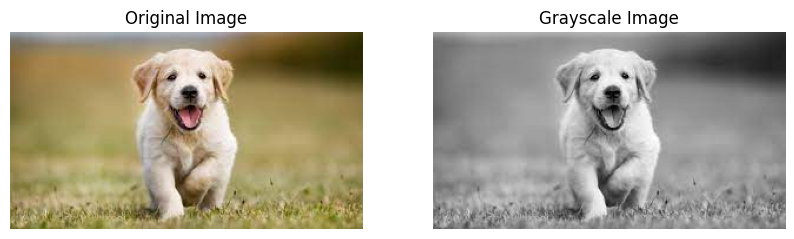

In [6]:
#Ans for Q2:
#Method 1: Use Matplotlib Subplots
# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


In [ ]:
#Method 2: Use OpenCV to create a combined image
# Convert grayscale image to 3 channels
image_gray_3c = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

# Stack images horizontally
combined_image = cv2.hconcat([image, image_gray_3c])

# Display the combined image
cv2.imshow('Combined Image', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-07-15 09:23:46.620 Python[1472:28735] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [1]:
#Ans for Q3:
import cv2

# Load the video
video = cv2.VideoCapture('img_pexels.mp4')

# Get the frame width and height
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set the new size (e.g., half the original size)
new_width = frame_width // 2
new_height = frame_height // 2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID' for AVI
out = cv2.VideoWriter('smaller_img_pexels.mp4', fourcc, 20.0, (new_width, new_height))

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    
    # Resize the frame
    resized_frame = cv2.resize(frame, (new_width, new_height))
    
    # Display the resized frame
    cv2.imshow('Resized Video', resized_frame)
    
    # Write the frame to the output video
    out.write(resized_frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when job is finished
video.release()
out.release()
cv2.destroyAllWindows()

2024-07-15 09:25:32.278 Python[1604:33864] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


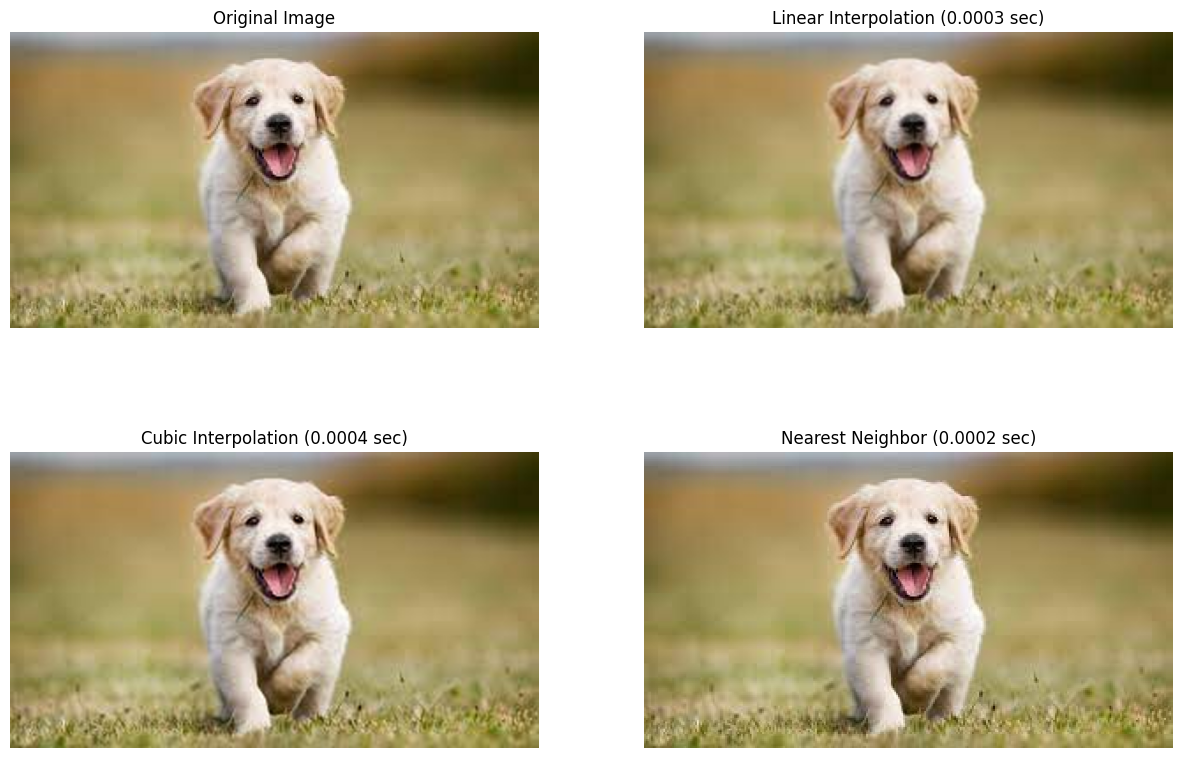

Linear Interpolation Time: 0.0003 seconds
Cubic Interpolation Time: 0.0004 seconds
Nearest Neighbor Interpolation Time: 0.0002 seconds


In [4]:
#Ans for Q4:
import time
from matplotlib import pyplot as plt
# Load the image
image = cv2.imread('dog.jfif')

# Set new size (e.g., double the original size)
new_size = (image.shape[1] * 2, image.shape[0] * 2)

#A Linear Interpolation
start_time = time.time()
linear_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
linear_time = time.time() - start_time

#B Cubic Interpolation
start_time = time.time()
cubic_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
cubic_time = time.time() - start_time

#C Nearest Neighbor Interpolation
start_time = time.time()
nearest_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
nearest_time = time.time() - start_time

# Display the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(linear_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Linear Interpolation ({linear_time:.4f} sec)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cubic_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Cubic Interpolation ({cubic_time:.4f} sec)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(nearest_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Nearest Neighbor ({nearest_time:.4f} sec)')
plt.axis('off')

plt.show()

# Print the execution times
print(f"Linear Interpolation Time: {linear_time:.4f} seconds")
print(f"Cubic Interpolation Time: {cubic_time:.4f} seconds")
print(f"Nearest Neighbor Interpolation Time: {nearest_time:.4f} seconds")
